In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [21]:
X, y = load_diabetes(return_X_y=True,as_frame=True)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [28]:
svm = SVR(C=1)
svm.fit(X_train, y_train)

SVR(C=1)

In [33]:
y_pred = svm.predict(X_train)

<Axes: xlabel='target', ylabel='target'>

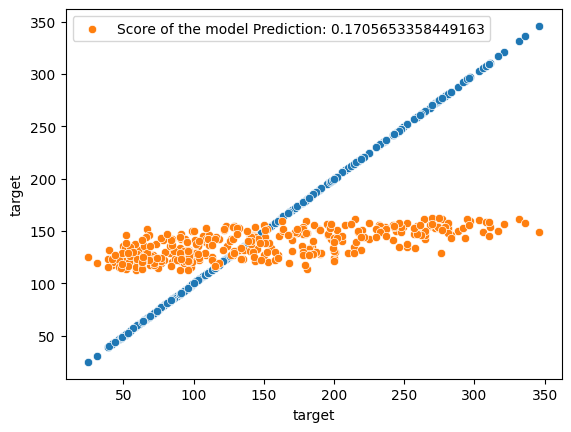

In [32]:
sns.scatterplot(y=y_train, x=y_train)
sns.scatterplot(y=svm.predict(X_train), x=y_train, label=f"Score of the model Prediction: {svm.score(X_train, y_train)}")

In [38]:
p_grid = {
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree": np.arange(1,6),
    "C":np.logspace(-3, 3,7)
}

grid = GridSearchCV(svm, param_grid=p_grid, cv=5)

In [39]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
grid.cv_results_


In [47]:
grid.best_estimator_

SVR(C=10.0, degree=1, kernel='sigmoid')

<Axes: xlabel='target', ylabel='target'>

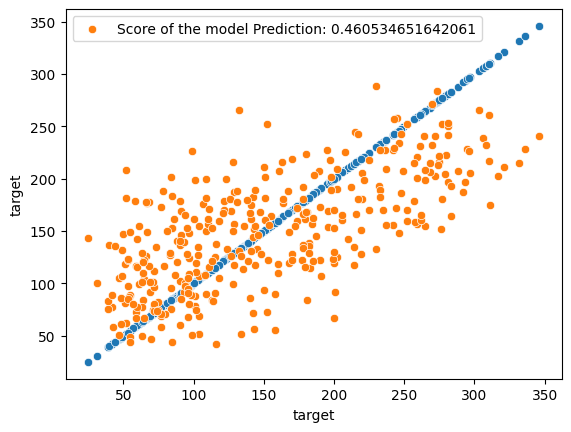

In [48]:
sns.scatterplot(y=y_train, x=y_train)
sns.scatterplot(y=grid.predict(X_train), x=y_train, label=f"Score of the model Prediction: {grid.score(X_train, y_train)}")